In [1]:
# imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# BUILDING BASE URL FOR TECH DATASET
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['EMP', 'ETH_GROUP', 'FACTORS_P', 'FACTORS_U', 'FACTORS_U_LABEL', 'FIRMPDEMP', 'FACTORS_P_LABEL', 'GEO_ID', 'NAICS2017', 'PAYANN', 'RCPPDEMP', 'TECHUSE', 'NAME'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS
response = requests.get(base_url, params=predicates)

In [3]:
# OWNER CHARACTERISTICS DATASET

response1 = requests.get('https://api.census.gov/data/2018/abscbo?get=NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_ETH,OWNER_RACE,OWNER_VET,OWNPDEMP&for=state:*&OWNCHAR=CG&NAICS2017=00&QDESC=O02&key=7c2c8ae1aefce7823680175cfa25d0ba300fe6f5')

response1.json()[0]

col_names1 = response1.json()[0]

bus_owner = pd.DataFrame(columns=col_names1, data = response1.json()[1:])

bus_owner.head()


,NAME,GEO_ID,NAICS2017_LABEL,OWNER_SEX,OWNER_ETH,OWNER_RACE,OWNER_VET,OWNPDEMP,OWNCHAR,NAICS2017,QDESC,state
0,Mississippi,0400000US28,Total for all sectors,001,001,00,001,1158,CG,00,O02,28
1,Missouri,0400000US29,Total for all sectors,001,001,00,001,3564,CG,00,O02,29
2,Montana,0400000US30,Total for all sectors,001,001,00,001,748,CG,00,O02,30
3,Nebraska,0400000US31,Total for all sectors,001,001,00,001,1612,CG,00,O02,31
4,Nevada,0400000US32,Total for all sectors,001,001,00,001,572,CG,00,O02,32


In [4]:
response.json()[0]

['EMP',
 'ETH_GROUP',
 'FACTORS_P',
 'FACTORS_U',
 'FACTORS_U_LABEL',
 'FIRMPDEMP',
 'FACTORS_P_LABEL',
 'GEO_ID',
 'NAICS2017',
 'PAYANN',
 'RCPPDEMP',
 'TECHUSE',
 'NAME',
 'state']

In [5]:
col_names = response.json()[0]

In [6]:
tech_data = pd.DataFrame(columns=col_names, data = response.json()[1:])

In [9]:
tech_data.head()

,EMP,ETH_GROUP,FACTORS_P,FACTORS_U,FACTORS_U_LABEL,FIRMPDEMP,FACTORS_P_LABEL,GEO_ID,NAICS2017,PAYANN,RCPPDEMP,TECHUSE,NAME,state
0,786873,001,00,00,All firms,17448,All firms,0400000US01,00,36136501,0,T2E03B99,Alabama,01
1,1420465,001,00,00,All firms,58136,All firms,0400000US01,00,65324725,0,T2E03BA9,Alabama,01
2,427265,001,00,00,All firms,30912,All firms,0400000US01,00,17464089,0,T3E03B01,Alabama,01
3,13853,001,00,00,All firms,253,All firms,0400000US01,00,899625,0,T3E03B02,Alabama,01
4,119682,001,00,00,All firms,4191,All firms,0400000US01,00,5254931,0,T3E03B03,Alabama,01


In [20]:
#Filtering data

robots_data = tech_data[['EMP', 'NAME', 'NAICS2017', 'TECHUSE' ]]
robots_data = robots_data[robots_data.TECHUSE.isin(['T4E03B03','T4E03B04', 'T4E03B05'])]
robots_data = robots_data[robots_data.NAICS2017 == '00']

robots_data.replace('T4E03B03', 'Robotics: Low use', inplace=True)
robots_data.replace('T4E03B04', 'Robotics: Moderate use', inplace=True)
robots_data.replace('T4E03B05', 'Robotics: High use', inplace=True)

robots_data.groupby(by =['NAME'])

robots_data.head(20)

,EMP,NAME,NAICS2017,TECHUSE
12,105873,Alabama,00,Robotics: Low use
13,71224,Alabama,00,Robotics: Moderate use
14,81388,Alabama,00,Robotics: High use
3208,9317,Alaska,00,Robotics: Low use
3209,13835,Alaska,00,Robotics: Moderate use
3210,0,Alaska,00,Robotics: High use
6223,88055,Arizona,00,Robotics: Low use
6224,76898,Arizona,00,Robotics: Moderate use
6225,71878,Arizona,00,Robotics: High use
9575,55751,Arkansas,00,Robotics: Low use


In [22]:
robots_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 12 to 158975
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   EMP        153 non-null    object
 1   NAME       153 non-null    object
 2   NAICS2017  153 non-null    object
 3   TECHUSE    153 non-null    object
dtypes: object(4)
memory usage: 6.0+ KB


In [61]:
robots_data['EMP'] = robots_data['EMP'].fillna(0).astype(int)


In [109]:

emp_state = robots_data[['EMP', 'NAME']]

emp_state = emp_state.groupby('NAME')['EMP'].max()

emp_state = emp_state.sort_values(ascending=False)

emp_state.head()



NAME
California      656349
Texas           631922
Florida         415909
Ohio            338237
Pennsylvania    310403
Name: EMP, dtype: int32

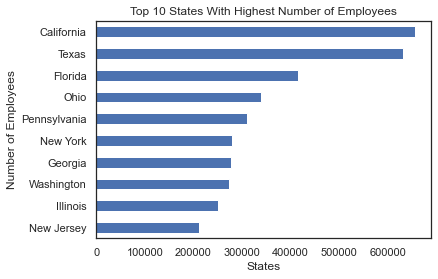

In [110]:

ax = emp_state[:10].plot(x='NAME', kind="barh")
sns.set(style="white")
plt.title('Top 10 States With Highest Number of Employees')
plt.xlabel('States')
plt.ylabel('Number of Employees')
plt.gca().invert_yaxis()
plt.show()

In [114]:

emp_state_tech = robots_data[['EMP', 'NAME', 'TECHUSE']]

emp_state_tech = emp_state_tech.groupby(['NAME', 'TECHUSE'])['EMP'].max()

emp_state_tech = emp_state_tech.sort_values(ascending=False)

emp_state_tech.head()

NAME        TECHUSE               
California  Robotics: Low use         656349
Texas       Robotics: Low use         631922
California  Robotics: Moderate use    440398
Florida     Robotics: Low use         415909
Texas       Robotics: Moderate use    356403
Name: EMP, dtype: int32

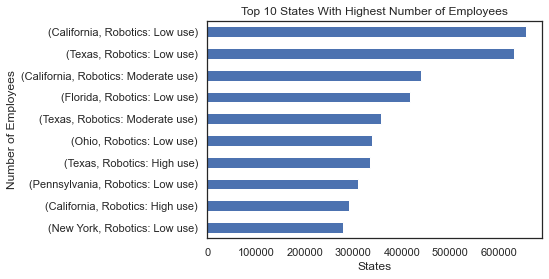

In [115]:
ax = emp_state_tech[:10].plot(x='NAME', kind="barh")
sns.set(style="white")
plt.title('Top 10 States With Highest Number of Employees')
plt.xlabel('States')
plt.ylabel('Number of Employees')
plt.gca().invert_yaxis()
plt.show()

In [124]:

emp_tech_min = robots_data[['EMP', 'NAME', 'TECHUSE']]

emp_tech_min = emp_tech_min.groupby(['NAME'])['EMP'].agg('min')

emp_tech_min = emp_tech_min.sort_values(ascending=True)

emp_tech_min.head()

NAME
Alaska                     0
District of Columbia    2754
Vermont                 3345
Wyoming                 4026
Maine                   4442
Name: EMP, dtype: int32

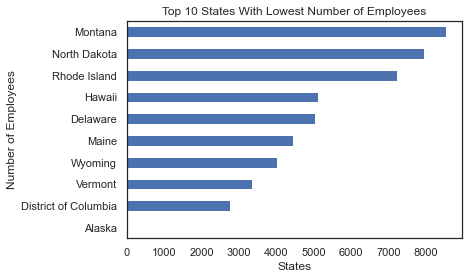

In [125]:
ax = emp_tech_min[:10].plot(x='NAME', kind="barh")
sns.set(style="white")
plt.title('Top 10 States With Lowest Number of Employees')
plt.xlabel('States')
plt.ylabel('Number of Employees')
plt.show()

In [127]:
emp_state_tech_min = robots_data[['EMP', 'NAME', 'TECHUSE']]

emp_state_tech_min = emp_state_tech_min.groupby(['NAME', 'TECHUSE'])['EMP'].min()

emp_state_tech_min = emp_state_tech_min.sort_values(ascending=True)

emp_state_tech_min.head()

NAME                  TECHUSE               
Alaska                Robotics: High use           0
District of Columbia  Robotics: High use        2754
Vermont               Robotics: Moderate use    3345
                      Robotics: High use        3563
Wyoming               Robotics: Moderate use    4026
Name: EMP, dtype: int32

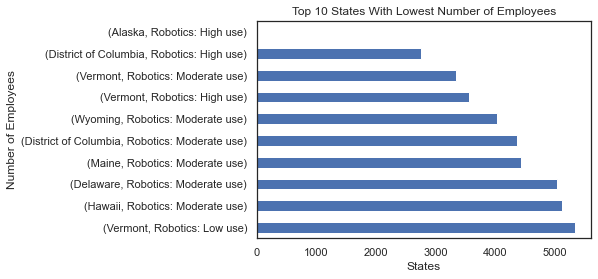

In [128]:
ax = emp_state_tech_min[:10].plot(x='NAME', kind="barh")
sns.set(style="white")
plt.title('Top 10 States With Lowest Number of Employees')
plt.xlabel('States')
plt.ylabel('Number of Employees')
plt.gca().invert_yaxis()
plt.show()

In [93]:

emp_high_tech = robots_data[['EMP', 'TECHUSE']]

emp_high_tech = emp_high_tech.groupby('TECHUSE')['EMP'].mean()

emp_high_tech = emp_high_tech.sort_values(ascending=False)

emp_high_tech.head()

TECHUSE
Robotics: Low use         131501.843137
Robotics: Moderate use     81219.784314
Robotics: High use         76237.196078
Name: EMP, dtype: float64

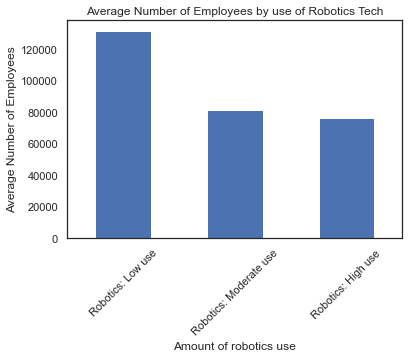

In [98]:

ax = emp_high_tech[:10].plot(x='TECHUSE', kind="bar")
sns.set(style="white")
plt.title('Average Number of Employees by use of Robotics Tech')
plt.xlabel('Amount of robotics use')
plt.ylabel('Average Number of Employees')
plt.xticks(rotation=45)
plt.show()